# Last moment EDA

In [1]:
import warnings
import os
import sys
import tqdm
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('error') # Treat warning as errors


data_root = '../data/OGLE3'

if os.path.exists(data_root):
    print('Succesfully found dataset root directory')
else:
    print('Invalid path to root directory. Quitting...')

Succesfully found dataset root directory


In [2]:
ogle_files = []
for rt, _, files in os.walk(data_root):
    for file in files:
        ogle_files.append(os.path.join(rt, file))
TOTAL_FILES = len(ogle_files)

mags, errors, lc_lengths = [], [], []

for fname in tqdm.tqdm(ogle_files):
    # Open file
    time, mag, error = [], [], []
    with open(fname, 'r') as f:
        n_read = 0
        for line in f.readlines():
            line = line.strip()
            values = list(map(float, line.split()))
            time.append(values[0])
            mag.append(values[1])
            error.append(values[2])
            n_read += 1
            if n_read > 200:
                break
    mags.extend(mag)
    errors.extend(error)
    lc_lengths.append(len(mag))

    

100%|██████████| 443717/443717 [02:29<00:00, 2976.38it/s]


In [3]:
np.min(mags), np.max(mags)

(0.013, 24.827)

Text(0.5, 0, 'Number of measurements in LC')

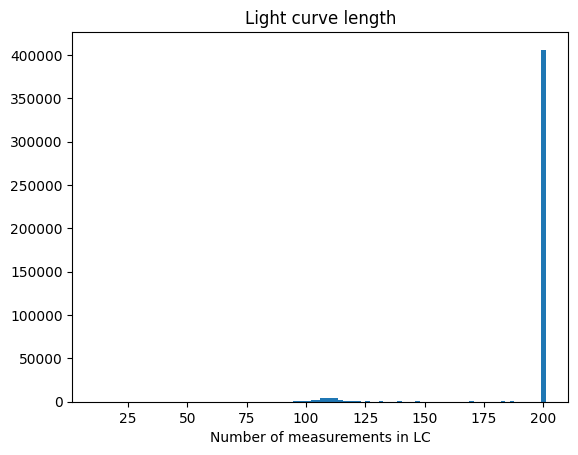

In [4]:
plt.hist(lc_lengths, bins=100)
plt.title('Light curve length')
plt.xlabel('Number of measurements in LC')

In [5]:
len(mags)

85927694

(10.0, 25.0)

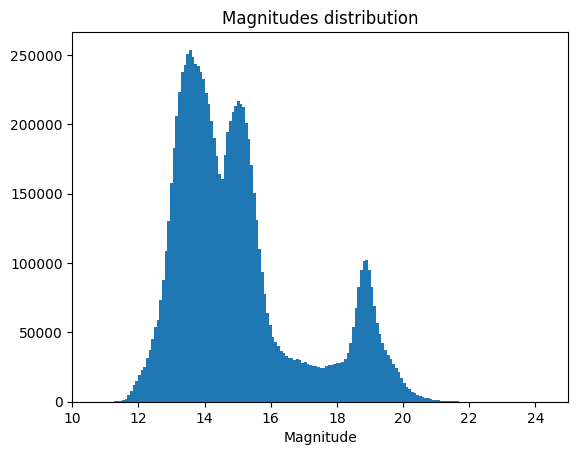

In [6]:
plt.hist(np.random.choice(mags, 10000000), bins=300)
plt.title('Magnitudes distribution')
plt.xlabel('Magnitude')
plt.xlim(10, 25)

(0.0, 0.3)

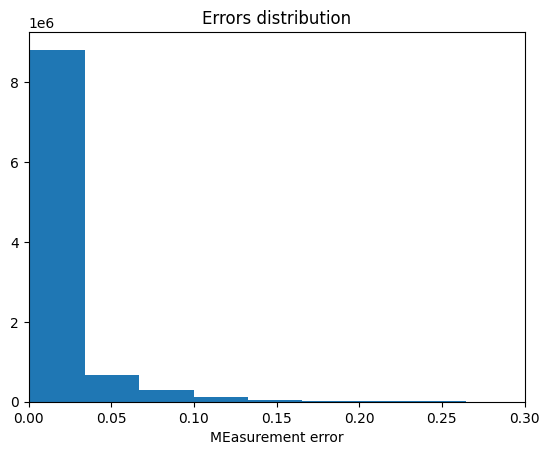

In [10]:
plt.hist(np.random.choice(errors, 10000000), bins=300)
plt.title('Errors distribution')
plt.xlabel('MEasurement error')
plt.xlim(0, 0.3)